# Hypothesis Testing

- Hypothesis Testing is a way of validating our inferences

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

In [2]:
# T-score for sampling distribution

def tscore(sample_mean,pop_mean,sam_std,sam_size):
    
    numerator = sample_mean - pop_mean
    denomenator = sam_std / sam_size**0.5
    return numerator / denomenator

# Hypothesis Test

First we make a bold claim against a statement

Step - 1:  Forming Null and Alternate Hypothesis

Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ >, \ <, \ \neq  $  
Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

Step - 2:  Taking a sample and computing its mean

* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

Step - 3: Compute Test Statistic: 

* If population variance is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

Step - 4: Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.

Step - 5.1: Apply decision rule:
* If test statistic is z-score -
    * Two tailed z-test: $$ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
    * Right tailed z-test: $$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed z-test: $$ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

## Question1

<b>Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?</b>

# Solution

First we make a bold claim against a statement

<b>Step - 1:</b>  Forming Null and Alternate Hypothesis

<b>Alternate Hypothesis (Bold claim) $ H_1$ :</b> On Average each packet doesnot contain 500 grams of biryani i.e $\mu$ $\neq$ $500$

<b>Null Hypothesis (Status Quo) $ H_0 $ :</b> On Average each packet contains 500 grams of biryani i.e $\mu$ = $500$

<b>Step - 2:</b>  Taking a sample and computing its mean

* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

In [3]:
sample = [490,220,470,500,495,496,496,498,508,480]

In [4]:
# Computing Sample Mean
sample_mean = sum(sample)/len(sample) #xbar

print(sample_mean)

465.3


In [5]:
# Population Mean
pop_mean = 500 #given


<b>Step - 3:</b> Compute Test Statistic: 

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$


In [6]:
sq_terms = []

# Sample Size
N = len(sample)

def sample_std(sample):
    
    sample_mean = sum(sample)/len(sample)
    
    for i in range(N):
        
        sq_terms.append((sample[i] - sample_mean)**2)
        
    sampleStd = (sum(sq_terms) / (N-1))**0.5
    
    return sampleStd

In [7]:
sampleStd = sample_std(sample)

print(sampleStd)

86.84859110991827


In [8]:
# Computing T-Score

t_score = tscore(sample_mean,pop_mean,sampleStd,N)

print(t_score)

-1.2634751284446715



<b>Step - 4:</b> Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.


In [9]:
# Two Tail - Calculating the t-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

#Degree of freedom
df = N-1

t_critical = t.ppf(1-alpha/2,df) # Two tailed t score for 95% Confidence Level

print(t_critical)

2.2621571627409915


<b>Step - 5.1:</b> Apply decision rule:
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$


In [10]:
# Two tailed test

if abs(t_score) > t_critical:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')

Fail to Reject Null Hypothesis


<b>Step - 5.2:</b> Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [11]:
p_val = 2*(1.0 - t.cdf(t_score,df))

print("P Value = ", p_val)

if p_val < alpha:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')

P Value =  1.7618352941467235
Fail to Reject Null Hypothesis


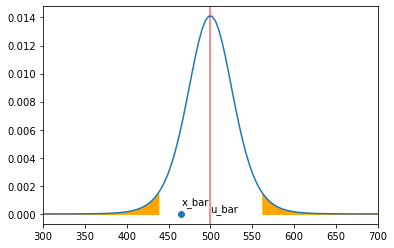

In [12]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 300
x_max = 700


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sampleStd / N**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = t.pdf(x,df,mean,std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = t.pdf(x1,df,mean, std)
plt.fill_between(x1, y1, color='orange')

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = t.pdf(x2,df,mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.axvline(pop_mean,alpha=0.6,c='r')
plt.annotate('u_bar', (pop_mean, 0.0002))
plt.annotate("x_bar", (sample_mean, 0.0007))

plt.show()
# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

# Question - 2

<b>Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?</b>

# Solution

First we make a bold claim against a statement

<b>Step - 1:</b>  Forming Null and Alternate Hypothesis

<b>Alternate Hypothesis (Bold claim) $ H_1 $:</b> Average User Rating greater than 4 i.e $\mu$ $>$ $4$

<b>Null Hypothesis (Status Quo) $ H_0 $ :</b> Average User Rating less than or equal 4 i.e $\mu$ $<=$ $4$

In [13]:
sample = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]

In [14]:
# Computing Sample Mean
sample_mean = sum(sample)/len(sample) #xbar

print(sample_mean)

4.25


In [15]:
# Population Mean
pop_mean = 4 #given


<b>Step - 3:</b> Compute Test Statistic: 

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$


In [16]:
sq_terms = []

# Sample Size
N = len(sample)

def sample_std(sample):
    
    sample_mean = sum(sample)/len(sample)
    
    for i in range(N):
        
        sq_terms.append((sample[i] - sample_mean)**2)
        
    sampleStd = (sum(sq_terms) / (N-1))**0.5
    
    return sampleStd

In [17]:
sampleStd = sample_std(sample)

print(sampleStd)

0.8506963092234007


In [18]:
# Computing T-Score

t_score = tscore(sample_mean,pop_mean,sampleStd,N)

print(t_score)

1.3142574813455419



<b>Step - 4:</b> Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.


In [19]:
# One Tail - Calculating the t-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

#Degree of freedom
df = N-1

t_critical = t.ppf(1-alpha,df) # One tail t score for 95% Confidence Level

print(t_critical)

1.729132811521367


<b>Step - 5.1:</b> Apply decision rule:
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$


In [20]:
# Two tailed test

if t_score > t_critical:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')

Fail to Reject Null Hypothesis


<b>Step - 5.2:</b> Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [21]:
p_val = (1.0 - t.cdf(t_score,df))

print("P Value = ", p_val)

if p_val < alpha:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')

P Value =  0.10220287084734081
Fail to Reject Null Hypothesis


Text(4.25, 0.0002, 'x_bar')

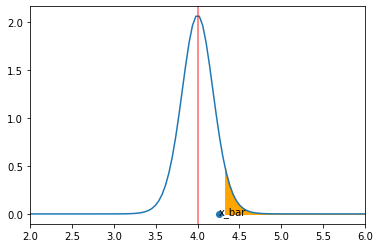

In [22]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 2
x_max = 6


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sampleStd / N**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = t.pdf(x,df,mean,std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (One tail Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = t.pdf(x2,df,mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.axvline(pop_mean,alpha=0.6,c='r')
plt.annotate("x_bar", (sample_mean, 0.0002))

# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

# Question - 3

<b>Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?</b>

# Solution

First we make a bold claim against a statement

<b>Step - 1:</b>  Forming Null and Alternate Hypothesis

<b>Alternate Hypothesis (Bold claim) $ H_1 $:</b> On average the SUV's mileage is at least 15 km/litre i.e $\mu$ $>$ $15$

<b>Null Hypothesis (Status Quo) $ H_0 $:</b> On average the SUV's mileage is less than equal to 15 km/litre i.e $\mu$ $<=$ $15$

In [23]:
sample = [14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]

In [24]:
# Computing Sample Mean
sample_mean = sum(sample)/len(sample) #xbar

print(sample_mean)

15.098999999999998


In [25]:
# Population Mean
pop_mean = 15 #given


<b>Step - 3:</b> Compute Test Statistic: 

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$


In [26]:
sq_terms = []

# Sample Size
N = len(sample)

def sample_std(sample):
    
    sample_mean = sum(sample)/len(sample)
    
    for i in range(N):
        
        sq_terms.append((sample[i] - sample_mean)**2)
        
    sampleStd = (sum(sq_terms) / (N-1))**0.5
    
    return sampleStd

In [27]:
sampleStd = sample_std(sample)

print(sampleStd)

1.0253671999517255


In [28]:
# Computing T-Score

t_score = tscore(sample_mean,pop_mean,sampleStd,N)

print(t_score)

0.4317882018907916



<b>Step - 4:</b> Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.


In [29]:
# One Tail - Calculating the t-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

#Degree of freedom
df = N-1

t_critical = t.ppf(1-alpha,df) # One tail t score for 95% Confidence Level

print(t_critical)

1.729132811521367


<b>Step - 5.1:</b> Apply decision rule:
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$


In [30]:
# Two tailed test

if abs(t_score) > t_critical:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')

Fail to Reject Null Hypothesis


<b>Step - 5.2:</b> Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [31]:
p_val = (1.0 - t.cdf(t_score,df))

print("P Value = ", p_val)

if p_val < alpha:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')

P Value =  0.3353777525126169
Fail to Reject Null Hypothesis


Text(15.098999999999998, 0.0002, 'x_bar')

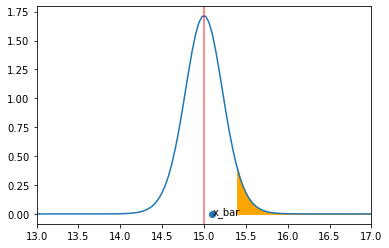

In [32]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 13
x_max = 17


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sampleStd / N**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = t.pdf(x,df,mean,std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (One tail Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = t.pdf(x2,df,mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.axvline(pop_mean,alpha=0.6,c='r')
plt.annotate("x_bar", (sample_mean, 0.0002))

# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

# Question - 4

<b>Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?</b>

# Solution

First we make a bold claim against a statement

<b>Step - 1:</b>  Forming Null and Alternate Hypothesis

<b>Alternate Hypothesis (Bold claim) $ H_1 $ :</b> On Average time taken to predict is less than 100ms i.e $\mu$ $<$ $100$

<b>Null Hypothesis (Status Quo) $ H_0 $ :</b> On Average time taken to predict is greater than equal to 100ms i.e $\mu$ $>=$ $100$

In [33]:
# Sample Mean
# Assume
sample_mean = 97.5

In [34]:
# Number of Samples
N = 100

In [35]:
# Population Mean
pop_mean = 100 #given


<b>Step - 3:</b> Compute Test Statistic: 

* If population variance is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$


In [36]:
# Assume
sampleStd = 5.0

In [37]:
# Computing T-Score

t_score = tscore(sample_mean,pop_mean,sampleStd,N)

print(t_score)

-5.0



<b>Step - 4:</b> Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.


In [38]:
# One Tail - Calculating the t-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

#Degree of freedom
df = N-1

t_critical = t.ppf(1-alpha,df) # One tail t score for 95% Confidence Level

print(t_critical)

1.6603911559963895


<b>Step - 5.1:</b> Apply decision rule:
    
* If test statistic is t-score
    * Two tailed t-test: $$ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Right tailed t-test: $$ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
    * Left tailed t-test: $$ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$


In [39]:
# One tailed test

if t_score < t_critical:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')

Reject Null Hypothesis


<b>Step - 5.2:</b> Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
* For one tailed test: $$ p \ value = (1.0 - cdf(test \ statistic)) $$
Now, $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [40]:
p_val = (1.0 - t.cdf(abs(t_score),df))

print("P Value = ", p_val)

if p_val < alpha:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')

P Value =  1.2406980064438855e-06
Reject Null Hypothesis


Text(97.5, 0.0002, 'x_bar')

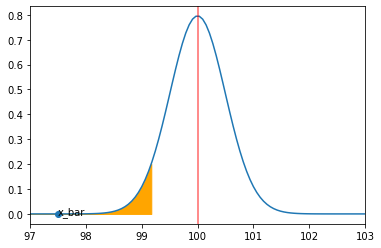

In [41]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 97
x_max = 103


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sampleStd / N**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = t.pdf(x,df,mean,std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (One tail Test)
t_critical_left = pop_mean + (-t_critical * std)

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = t.pdf(x1,df,mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.axvline(pop_mean,alpha=0.6,c='r')
plt.annotate("x_bar", (sample_mean, 0.0002))

# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis